In [1]:
## APARTADO C

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Consumo_cerveja.txt", header=0, delimiter=',', decimal=".", names=["DATA","TEMPMED","TEMPMIN","TEMPMAX","PREC","FINSEM","CONSUM"])

data = dataset.values

x = data[:, 1:-1]
y = data[:, -1]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)


Dimensionalitat de la BBDD: (365, 7)
Dimensionalitat de les entrades X (365, 5)
Dimensionalitat de l'atribut Y (365,)


In [2]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATA     365 non-null    object 
 1   TEMPMED  365 non-null    float64
 2   TEMPMIN  365 non-null    float64
 3   TEMPMAX  365 non-null    float64
 4   PREC     365 non-null    float64
 5   FINSEM   365 non-null    int64  
 6   CONSUM   365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


,TEMPMED,TEMPMIN,TEMPMAX,PREC,FINSEM,CONSUM
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


/tmp/ipykernel_46857/1552111491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = dataset.corr()


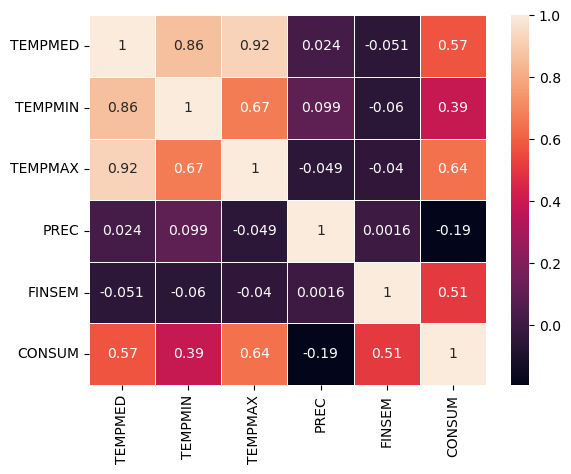

In [3]:
co = dataset.corr()
plt.figure()

ax = sns.heatmap(co, annot=True, linewidths=.5)

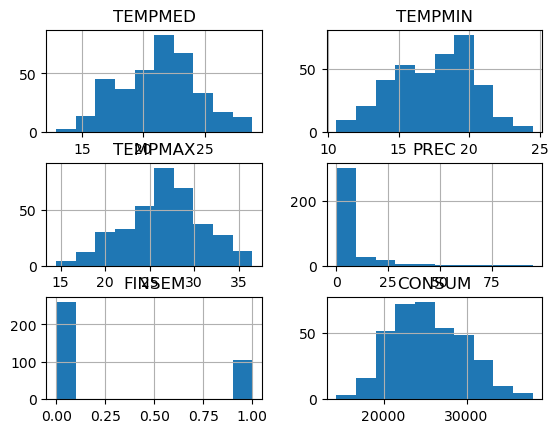

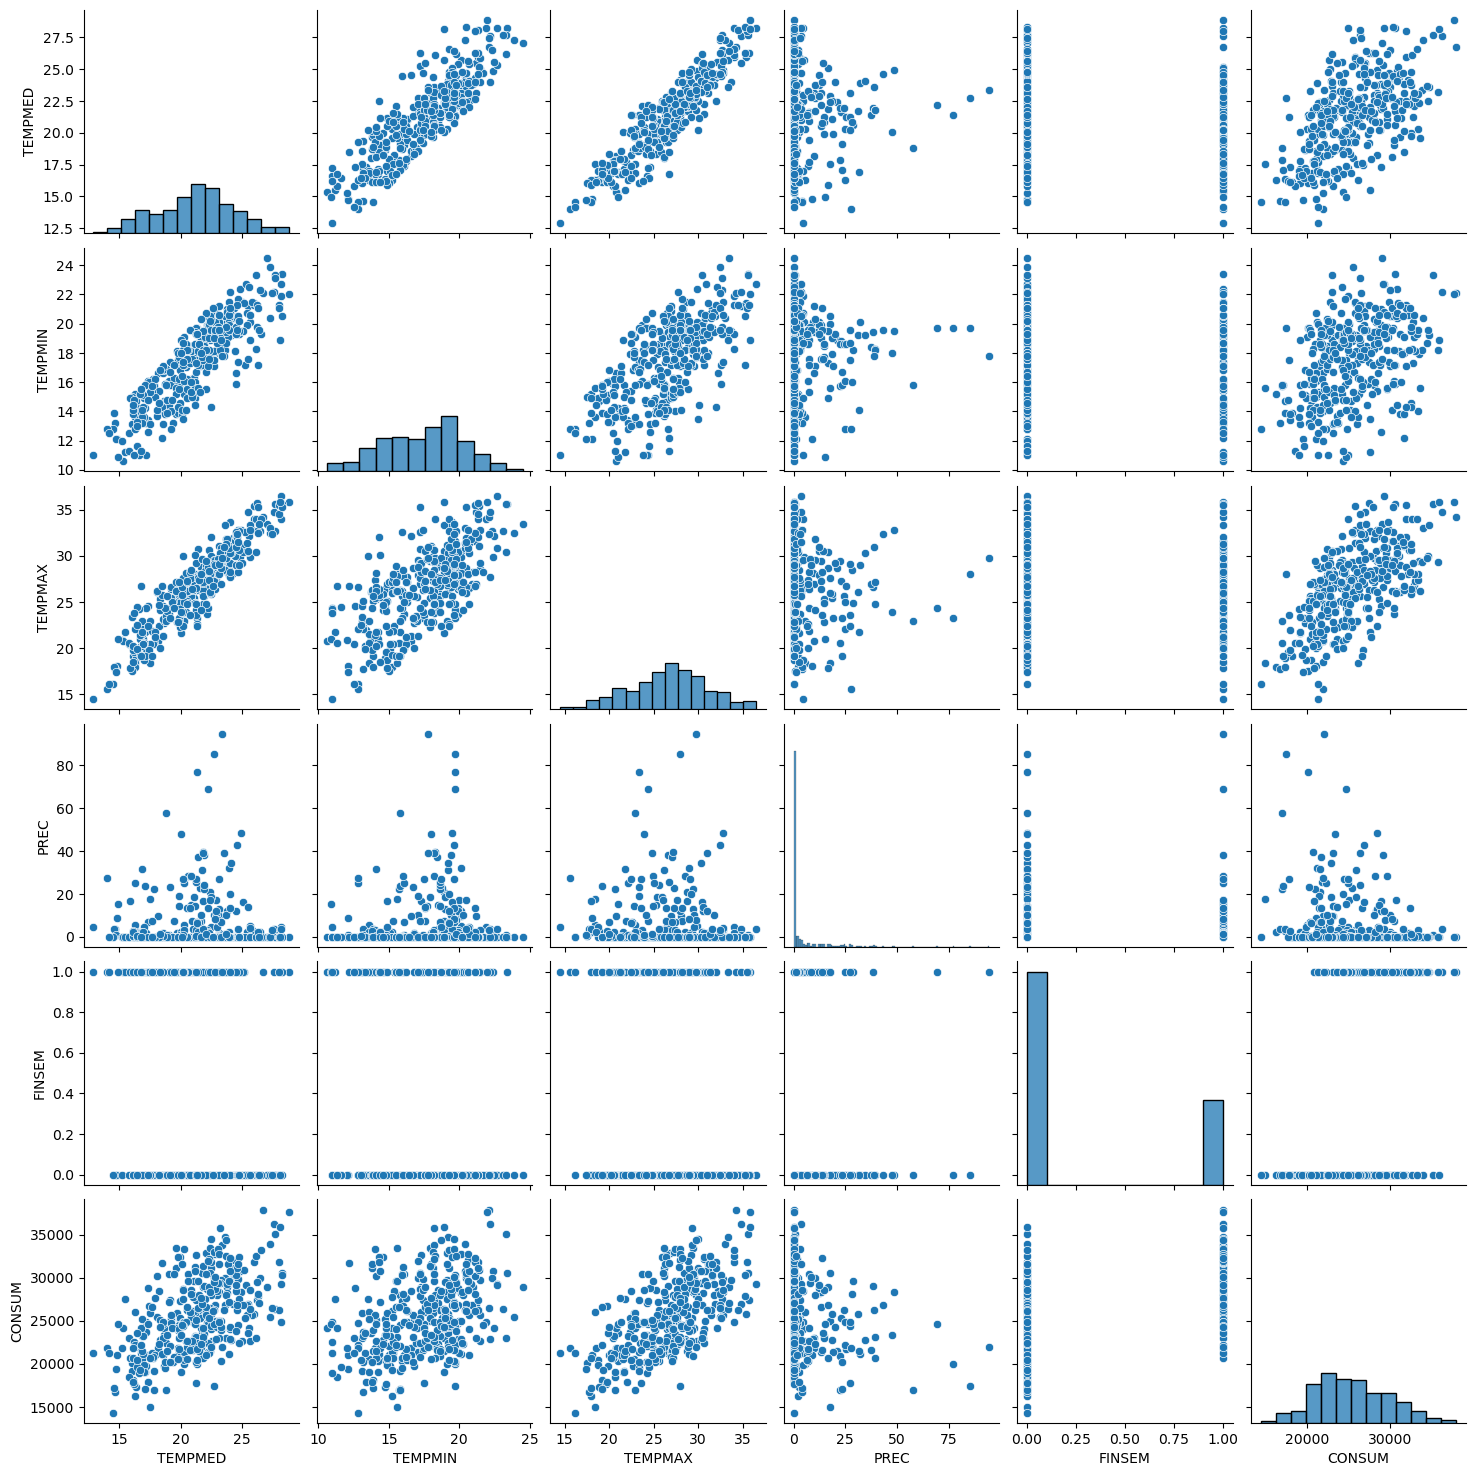

In [4]:
dataset.hist()
rel = sns.pairplot(dataset)

In [5]:
dataset.drop(['PREC'], axis=1)

,DATA,TEMPMED,TEMPMIN,TEMPMAX,FINSEM,CONSUM
0,2015-01-01,27.30,23.9,32.5,0,25461
1,2015-01-02,27.02,24.5,33.5,0,28972
2,2015-01-03,24.82,22.4,29.9,1,30814
3,2015-01-04,23.98,21.5,28.6,1,29799
4,2015-01-05,23.82,21.0,28.3,0,28900
...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,1,32307
361,2015-12-28,22.64,21.1,26.7,0,26095
362,2015-12-29,21.68,20.3,24.1,0,22309
363,2015-12-30,21.38,19.3,22.4,0,20467


In [6]:
## APARTADO B


## codigo que nos dan
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])



import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [8]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x = x.astype(float)

x = standarize(x)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.metrics import r2_score

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_test[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)
    error = mse(y_test, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Error en atribut 0: 13200672.097840
R2 score en atribut 0: 0.449564
Error en atribut 1: 20044702.620500
R2 score en atribut 1: 0.164185
Error en atribut 2: 10249413.674841
R2 score en atribut 2: 0.572625
Error en atribut 3: 22750261.570834
R2 score en atribut 3: 0.051370
Error en atribut 4: 19411638.705191
R2 score en atribut 4: 0.190582
